In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os
#sys.path.insert(0,'/Users/saskiad/allensdk')

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.core.brain_observatory_nwb_data_set import BrainObservatoryNwbDataSet





In [2]:
expt_cont= 511509529

In [3]:
boc.get_experiment_containers(ids=[expt_cont])

[{'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'id': 511509529,
  'imaging_depth': 175,
  'targeted_structure': u'VISp'}]

In [4]:
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_cont])

In [5]:
expt_session_info

[{'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511509529,
  'id': 501337989,
  'imaging_depth': 175,
  'session_type': u'three_session_C',
  'targeted_structure': u'VISp'},
 {'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511509529,
  'id': 501271265,
  'imaging_depth': 175,
  'session_type': u'three_session_A',
  'targeted_structure': u'VISp'},
 {'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511509529,
  'id': 500964514,
  'imaging_depth': 175,
  'session_type': u'three_session_B',
  'targeted_structure': u'VISp'}]

In [6]:
expt_id = 500964514 # session B (nat scenes)

In [10]:
from scipy.io import savemat

def loadexpt_save2mat(expt_id,filename):
    drive_path = '/Volumes/Brain2016'
    manifest_path = os.path.join(drive_path, 'BrainObservatory','manifest.json')
    boc =  BrainObservatoryCache(manifest_file=manifest_path)
    data_set = boc.get_ophys_experiment_data(ophys_experiment_id = expt_id)
    timestamps,traces = data_set.get_corrected_fluorescence_traces()
    dict1 = {}
    dict1['traces'] = traces
    savemat(filename,dict1)
    return traces     

In [23]:
cell_id = data_set.get_cell_specimen_indices([517409542])[0]
print('cell id = ', cell_id)

('cell id = ', 17)


In [11]:
import numpy as np
np.shape(traces)

(213, 114097)

(100, 300)

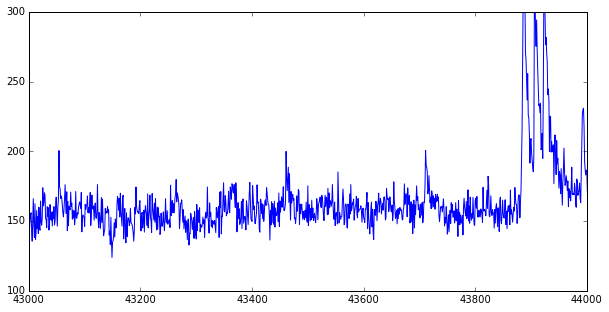

In [33]:
plt.figure(figsize=(10,5))
plt.plot(traces[cell_id,:])
plt.xlim(43000,44000)
plt.ylim(100,300)

In [34]:
traces.shape

(213, 114097)

In [24]:
dict1 = {}
dict1['traces'] = traces[cell_id,:]

In [11]:
expt_id2 = 501271265
loadexpt_save2mat(expt_id2,'corrected_traces_sessionA')

array([[ 303.50073242,  293.19512939,  304.43008423, ...,  286.84127808,
         297.00280762,  292.96478271],
       [ 192.74528503,  176.77850342,  179.57339478, ...,  156.57357788,
         169.4430542 ,  168.5438385 ],
       [ 267.80352783,  272.22299194,  272.56066895, ...,  257.74578857,
         249.5763855 ,  255.70278931],
       ..., 
       [ 303.59570312,  319.20727539,  311.68707275, ...,  294.72381592,
         300.30844116,  308.671875  ],
       [ 245.37298584,  258.84307861,  244.60702515, ...,  259.78363037,
         240.07458496,  242.71525574],
       [ 167.21910095,  174.92022705,  175.5038147 , ...,  164.06735229,
         159.92945862,  158.79321289]], dtype=float32)